# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

with r = radius of Earth from the Sun and $\mu$ is the gravitational parameter of the sun (also called $GM$).
In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**

Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plane to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$

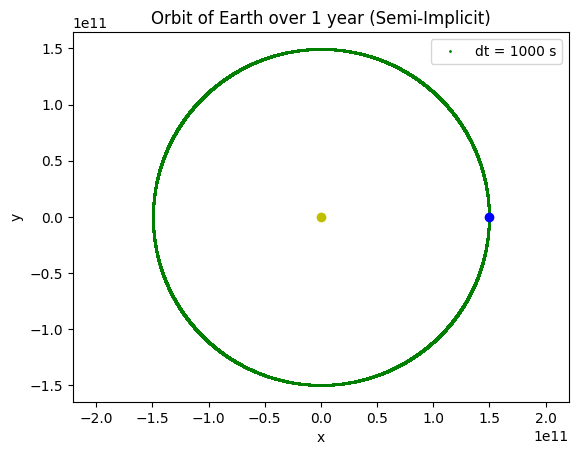

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def kinetic_energy(vx, vy):
    m_earth = 5.972 * (10**24)  # kg
    return 0.5 * m_earth * (vx**2 + vy**2)

def gravitational_potential_energy(mu, r):
    m_earth = 5.97219 * 10**24  # kilograms
    return mu * m_earth / r  # Joules

def orbit(dt, plot=False, explicit=False):
    """ Calculate the orbit of the Earth around the Sun

    Args:
        dt (float): Time step Units: s
        plot (bool, optional): Boolean to determine if the orbit is plotted. Defaults to False to preserve runtime.
        explicit (bool, optional): Boolean to determine if the explicit or semi-implicit method is used. Defaults to False.

    Returns:
        init_energy (float): Initial energy of the Earth at the start of the orbit Units: Joules
        final_energy (float): Final energy of the Earth at the end of the orbit Units: Joules
    """
    # Constants
    gm_Sun = 1.3271 * (10**20)  # Newtons, also an approximation of mu for the Sun in m^3/s^2
    init_radius = 1.496 * (10**11)  # Metres, initial radius of the Earth from the Sun

    acceleration = gm_Sun / init_radius**2  # m/s^2, initial acceleration of the Earth towards the Sun

    # Time parameters
    t_per_year = 365.256 * 24 * 60 * 60  # Seconds per year
    n_steps = int(t_per_year / dt)  # Number of steps

    # Arrays
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    vx = np.zeros(n_steps)
    vy = np.zeros(n_steps)

    vy[0] = np.sqrt(acceleration * init_radius)  # All of the initial velocity is in the y-direction
    x[0] = init_radius  # Initial x-position of the Earth is at the radius

    # Iterative versions
    radius = init_radius

    for i in range(n_steps - 1):
        # Recalculate radius and acceleration just in case energy has been lost
        radius = np.sqrt(x[i]**2 + y[i]**2)
        ax = -gm_Sun * x[i] / radius**3
        ay = -gm_Sun * y[i] / radius**3

        if explicit == False:
            # Use semi-implicit method
            vx[i + 1] = vx[i] + ax * dt
            vy[i + 1] = vy[i] + ay * dt

            x[i + 1] = x[i] + vx[i + 1] * dt
            y[i + 1] = y[i] + vy[i + 1] * dt
        else:
            # Use explicit method
            x[i + 1] = x[i] + vx[i] * dt
            y[i + 1] = y[i] + vy[i] * dt

            vx[i + 1] = vx[i] + ax * dt
            vy[i + 1] = vy[i] + ay * dt



    # Calculate the initial and final energies
    init_energy = kinetic_energy(vx[0], vy[0]) + gravitational_potential_energy(gm_Sun, radius)
    final_energy = kinetic_energy(vx[-1], vy[-1]) + gravitational_potential_energy(gm_Sun, np.sqrt(x[-1]**2 + y[-1]**2))

    if plot == True:
        # Only plot if specified
        plt.plot(x, y, 'go', markersize=1, label=f'dt = {dt} s')
        plt.plot(0, 0, 'yo')  # Yellow marker for the sun
        plt.plot(x[0], 0, 'bo')  # Dark blue marker for Earth's initial position
        plt.axis('equal')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        if explicit == False:
            plt.title("Orbit of Earth over 1 year (Semi-Implicit)")
        else:
            plt.title("Orbit of Earth over 1 year (Explicit)")

    return init_energy, final_energy

# Run the orbit function
time_step = 1000
__ = orbit(time_step, plot=True)


### b) **Fractional Energy Change**

Using different timesteps $\Delta t$ ranging from $\Delta t = 0.1$ years to $\approx 10^{-9}$ years $(\approx 0.04$ seconds), plot the fractional energy change $\frac{\Delta E}{E}$ against timestep $\Delta t$ and number of steps $N$.
$$\frac{\Delta E}{E} = \frac{E_{final} - E_{initial}}{E_{initial}}$$
$$E = E_{grav} + E_{kinetic} =\frac{GMm}{r} + {\frac{1}{2} mv^2} \approx \frac{\mu m}{r} + \frac{1}{2} mv^2$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

def orbit_2(dt):
    """ Evolve the system over a specified time step

    Args:
        dt (float): Time step Units: yr

    Returns:
        energy (float): Final energy of the system Units: Joules
        nsteps (int): Number of time steps taken
    """
    # Initial conditions
    y = 0.0
    x = AU
    vx = 0.0
    vy = v_Earth

    dt = 10.0**dt * secperyear

    for i in range(nsteps):
        # Compute the acceleration
        rad = (x**2 + y**2)**(3/2)
        ax = - GM * x / rad
        ay = - GM * y / rad

        # Take the timestep
        vx = vx + ax * dt
        vy = vy + ay * dt

        x = x + vx * dt
        y = y + vy * dt

    energy = - GM / (x**2 + y**2)**0.5 + 0.5 * (vx**2 + vy**2)

    return energy

# Constants
GM = 1.3271e20   # Gravitational parameter for the Sun (SI units)
AU = 1.496e11    # AU = astronomical unit (Earth-Sun distance) in m
secperyear = 3600 * 24 * 365

# Compute the velocity and energy for a circular orbit
v_Earth = np.sqrt(GM / AU)
E_init = - 0.5 * GM / AU

# Time-step values to try
dt_vals = np.arange(-1, -9.1, -0.5)


E_vals = np.array([])
n_vals = 10**(0 - dt_vals)

for dt in dt_vals:
    t0 = time.time()
    E, nsteps = orbit_2(dt)
    t1 = time.time()
    E_vals = np.append(E_vals, np.abs((E - E_init) / E_init))

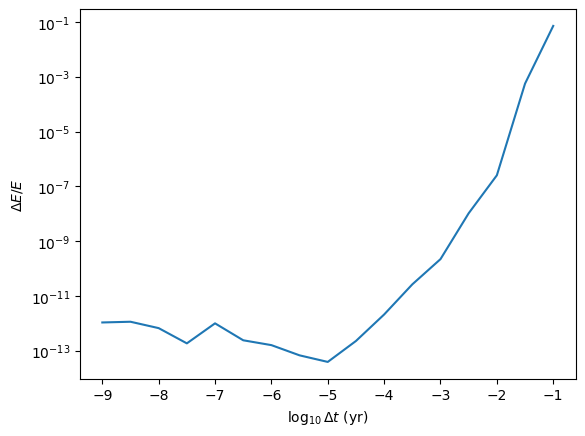

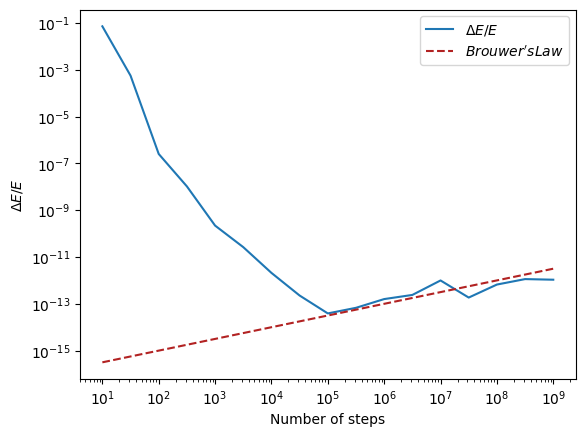

In [29]:
n_vals = 10**(0 - dt_vals)

plt.plot(dt_vals, E_vals)
plt.yscale('log')
plt.xlabel(r'$\log_{10}\Delta t\ (\mathrm{yr})$')
plt.ylabel(r'$\Delta E/E$')
plt.show()

plt.clf()
plt.plot(n_vals, E_vals, label=r'$\Delta E/E$')
plt.plot(n_vals, 1e-16 * np.sqrt(n_vals), "--", color = "firebrick", label=r"$Brouwer's Law$")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of steps')
plt.ylabel(r'$\Delta E/E$')
plt.legend()
plt.show()

**How does it behave for large or small $\Delta t$?**

For very small $\Delta t$ (i.e. large N), the error in energy is small ( $O(10^{-11})$ ) and tends to scale alongside Brouwer's Law. However, when the number of steps is less than around $10^{5}$, the error grows rapidly, peaking at around a fractional error of 0.1 (10%).

**Do you see any evidence for Brouwer's Rule?**

At many steps N (N $> 10^5$), Brouwer's Rule appears to be proportional to Brouwer's Law.

### c) **Explicit Euler Method**

The *explicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n}\Delta t$$
where you're using the current velocity to update the position, rather than the next velocity.

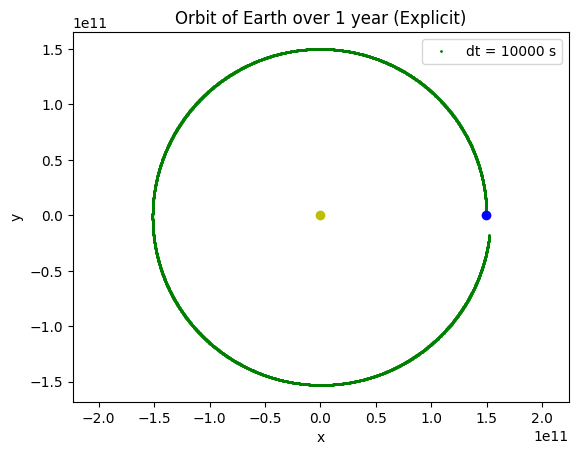

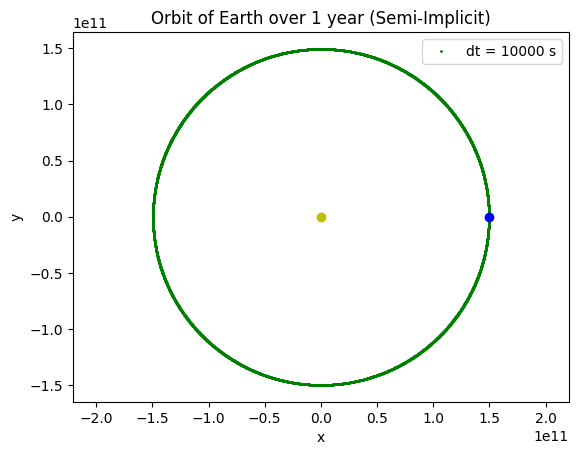

In [34]:
#Explicit Method
plt.figure(1)
__ = orbit(10000, plot = True, explicit = True)

#Semi-Implicit Method
plt.figure(2)
__ = orbit(10000, plot = True, explicit = False)

# **Question 2**

### a) **Interpolation and Thermodynamics**

The pressure and entropy per particle of an ideal gas are given by:
$$ P = nk_BT = \frac{\rho k_BT}{m}$$
$$S = k_B(\frac{5}{2} - ln(\frac{n}{nQ}))$$

where T is temperature, n is the number density of molecules, and $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$ with m being the particle mass. Density ranges from $10^{-6}$ to 1 $kgm^{-3}$, and temperature ranges from 100 to 1000 K. Also, assume that m = $28m_u$, where $m_u = 1.67377 \times 10^{-27}$ kg is the atomic mass unit.

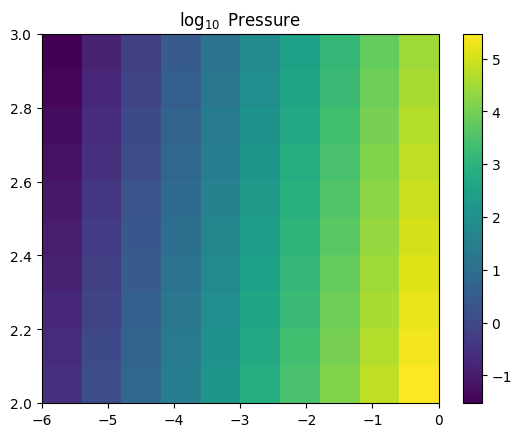

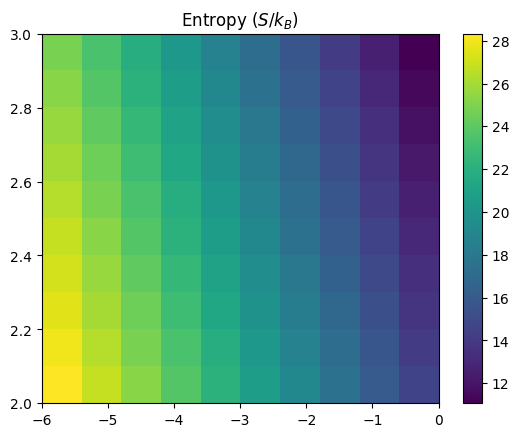

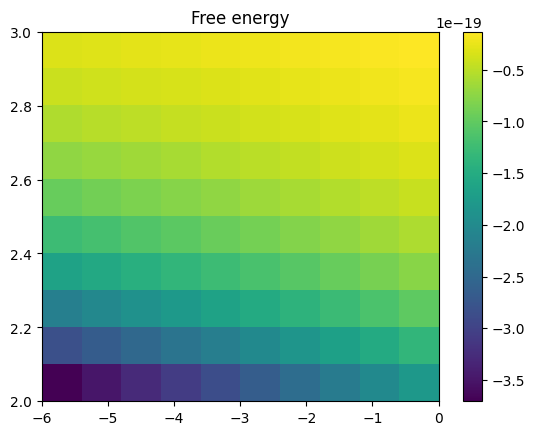

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def pressure(rho, T):
    n = rho / (28 * mu)
    return n * kB * T

def entropy(rho, T):
    n = rho / (28 * mu)
    nQ = (28 * mu * kB * T / (2 * np.pi * hbar**2))**1.5
    return kB * (2.5 - np.log(n / nQ))

def gibbs_free(rho, T):
    n = rho / (28 * mu)
    nQ = (28 * mu * kB * T / (2 * np.pi * hbar**2))**1.5
    return kB * T * (np.log(n / nQ) - 1.0)

# Constants
mu = 1.66e-27  # kg
kB = 1.381e-23  # J/K
hbar = 6.626e-34  # J s

# Grid in log T and log rho
temp_array = np.linspace(2, 3, 10)
coarse_density_array = np.linspace(-6, 0.0, 10)
coarse_temp_grid, coarse_density_grid = np.meshgrid(temp_array, coarse_density_array, indexing='ij')
coarse_pressure_grid = np.log10(pressure(10**coarse_density_grid, 10**coarse_temp_grid))
coarse_entropy_grid = entropy(10**coarse_density_grid, 10**coarse_temp_grid) / kB
coarse_free_energy_grid = gibbs_free(10**coarse_density_grid, 10**coarse_temp_grid)

# Plotting
plt.figure(1)
plt.imshow(coarse_pressure_grid, aspect='auto', extent=(coarse_density_array[0], coarse_density_array[-1], temp_array[0], temp_array[-1]), interpolation='none')
plt.title(r'$\log_{10}$ Pressure')
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(coarse_entropy_grid, aspect='auto', extent=(coarse_density_array[0], coarse_density_array[-1], temp_array[0], temp_array[-1]), interpolation='none')
plt.title(r'Entropy ($S/k_B$)') 
plt.colorbar()
plt.show()

plt.figure(3)
plt.imshow(coarse_free_energy_grid, aspect='auto', extent=(coarse_density_array[0], coarse_density_array[-1], temp_array[0], temp_array[-1]), interpolation='none')
plt.title(r'Free energy')
plt.colorbar()
plt.show()

Calculate Entropy by differentiating the free energy

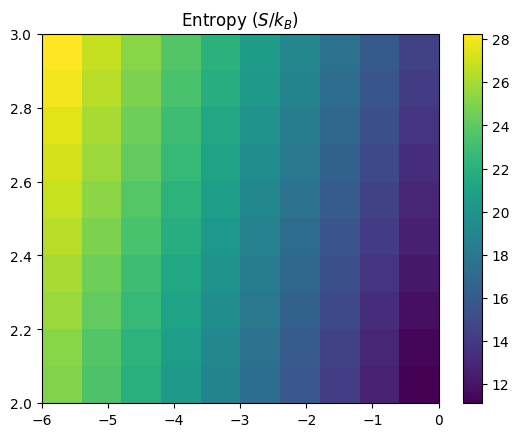

In [48]:
# Interpolation
energy_interpolator = sp.interpolate.RectBivariateSpline(temp_array, coarse_density_array, coarse_free_energy_grid)
partial_entropy = energy_interpolator.partial_derivative(1, 0)

# Plotting
plt.clf()
plt.imshow(partial_entropy(temp_array, coarse_density_array) / (10.0**coarse_temp_grid * np.log(10) * kB) * -1.0, aspect='auto', origin='lower', extent=(coarse_density_array[0], coarse_density_array[-1], temp_array[0], temp_array[-1]), interpolation='none')
plt.title(r'Entropy ($S/k_B$)')
plt.colorbar()
plt.show()

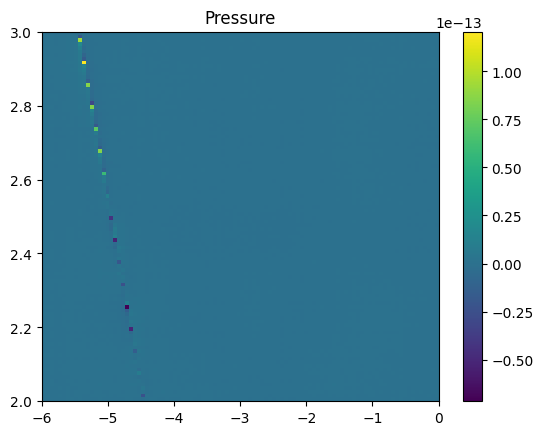

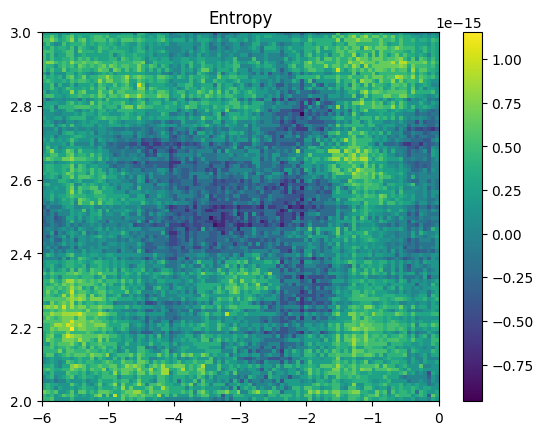

In [49]:
# Interpolation
pressure_interpolator = sp.interpolate.RectBivariateSpline(temp_array, coarse_density_array, coarse_pressure_grid)
entropy_interpolator = sp.interpolate.RectBivariateSpline(temp_array, coarse_density_array, coarse_entropy_grid)

dPdT = pressure_interpolator.partial_derivative(1, 0)
dSdrho = entropy_interpolator.partial_derivative(0, 1)

# Compute the function on a finer grid
fine_temp_array = np.linspace(2, 3, 100)
fine_density_array = np.linspace(-6, 0.0, 100)
fine_temp_grid, fine_density_grid = np.meshgrid(fine_temp_array, fine_density_array, indexing='ij')
ngrid2 = 10.0**fine_density_grid / (28 * mu)
fine_pressure_grid = np.log10(pressure(10**fine_density_grid, 10**fine_temp_grid))
fine_entropy_grid = entropy(10**fine_density_grid, 10**fine_temp_grid) / kB

# Plot the fractional error

pressure_frac_error = (pressure_interpolator(fine_temp_array, fine_density_array) - fine_pressure_grid) / fine_pressure_grid

entropy_frac_error = (entropy_interpolator(fine_temp_array, fine_density_array) - fine_entropy_grid) / fine_entropy_grid

plt.figure(1)
plt.imshow(pressure_frac_error, origin='lower', extent=(fine_density_array[0], fine_density_array[-1], fine_temp_array[0], fine_temp_array[-1]), aspect='auto')
plt.title("Pressure")
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(entropy_frac_error, origin='lower', extent=(fine_density_array[0], fine_density_array[-1], fine_temp_array[0], fine_temp_array[-1]), aspect='auto')
plt.title("Entropy")
plt.colorbar()
plt.show()


Since the P function is bilinear in $\rho$ and T, the spline interpolation fits it very well. This is why the fractional error is approximately the roundoff error, since the only error is the roundoff error.

Similar to the pressure, the entropy is well approximated by the spline given that it is bilinear. However, there is some error around the $\rho = 0$ mark. Because the natural log of such a small number is quite large, this is reflected from the formula. Otherwise, the error is approximately the roundoff.

### b) **Thermodynamic Consistency**

Now check to what extent your interpolation is thermodynamically consistent: In terms of the Helmholtz free energy per particle $F = E - TS$, where $E = (3/2)k_BT$ is the internal energy per particle, the pressure and entropy are given by
$$ S = - \frac{\partial F}{\partial T}|_n $$
$$ P = n^2 \frac{\partial F}{\partial n}|_T $$

This implies that the entropy and pressure must satisfy the Maxwell relation:
$$ - \frac{\partial S}{\partial n}|_T = \frac{1}{n^2} \frac{\partial P}{\partial T}|_n $$

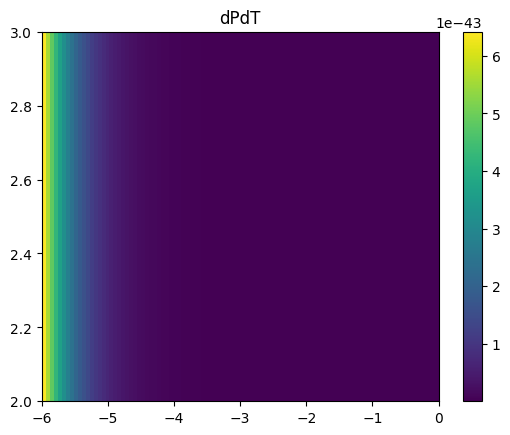

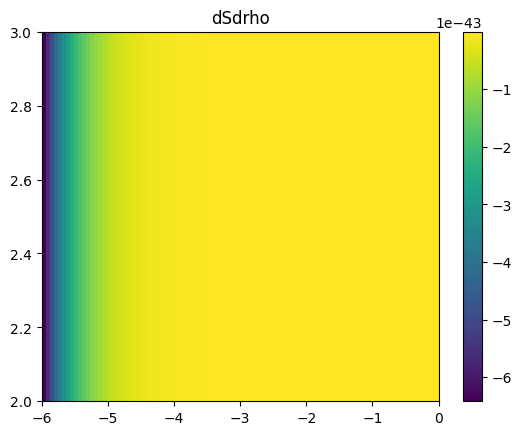

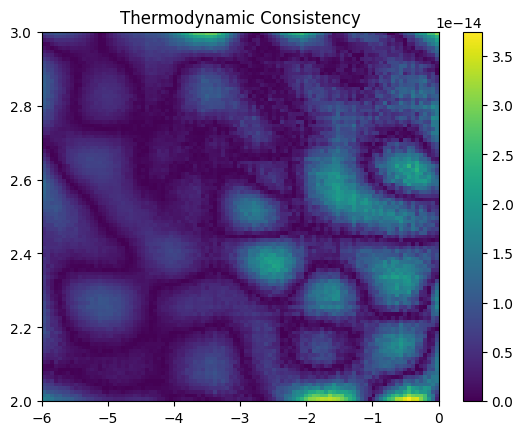

In [52]:
# Check for thermodynamic consistency using derivatives
f1 = 10**pressure_interpolator(fine_temp_array, fine_density_array) * dPdT(fine_temp_array, fine_density_array) / 10**fine_temp_grid / ngrid2**2

plt.figure(1)
plt.imshow(f1, origin='lower', extent=(fine_density_array[0], fine_density_array[-1], fine_temp_array[0], fine_temp_array[-1]), aspect='auto')
plt.title("dPdT")
plt.colorbar()
plt.show()

f2 = kB * dSdrho(fine_temp_array, fine_density_array) / (np.log(10) * ngrid2)

plt.figure(2)
plt.imshow(f2, origin='lower', extent=(fine_density_array[0], fine_density_array[-1], fine_temp_array[0], fine_temp_array[-1]), aspect='auto')
plt.title("dSdrho")
plt.colorbar()
plt.show()

consistency = np.abs((f1 + f2) / f1)

plt.figure(3)
plt.imshow(consistency, origin='lower', extent=(fine_density_array[0], fine_density_array[-1], fine_temp_array[0], fine_temp_array[-1]), aspect='auto')
plt.title("Thermodynamic Consistency")
plt.colorbar()
plt.show()